In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import itertools
from pathlib import Path
from statistics import mean
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
Score_Genre_df = pd.read_csv("../../csv_file/Score_Genre_Earnings.csv")
Score_Genre_df = Score_Genre_df.set_index('Key')

# Empty columns need to be dropped after merge
# Trial and error of making DataFrames found that these four columns were all null
Score_Genre_df = Score_Genre_df.drop(['SHORT WAR', 'REALITY-TV', 'TALK-SHOW', 'GAME-SHOW'], axis=1)

Score_Genre_df.rename(columns = {"SCI-FI": "SCI_FI"}, inplace = True)
Score_Genre_df.head()

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,ACTION,DRAMA,SCI_FI,THRILLER,MYSTERY,HISTORY,...,HORROR,DOCUMENTARY,WESTERN,BIOGRAPHY,FAMILY,MUSIC,MUSICAL,FANTASY,WAR,NEWS
Key,,,,,,,,,,,,,,,,,,,,,
5,16.0,61.0,8.0,29.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,25.0,68.0,36.0,48.0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,36.0,75.0,81.0,62.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15,42.0,83.0,89.0,78.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
16,37.0,63.0,91.0,70.0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0


In [9]:
# Action
Score_Genre_df_Action = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'ACTION'])
Score_Genre_df_Action = Score_Genre_df_Action[Score_Genre_df_Action['ACTION']!= 0]
Score_Genre_df_Action

,Hidden_Gem_Score,IMDb_Score,Rotten_Tomatoes_Score,Metacritic_Score,ACTION
Key,,,,,
21,24.0,58.0,39.0,49.0,1
35,31.0,65.0,68.0,52.0,1
36,22.0,50.0,40.0,45.0,1
37,29.0,53.0,68.0,53.0,1
40,16.0,51.0,9.0,34.0,1
...,...,...,...,...,...
9379,43.0,74.0,76.0,63.0,1
9389,34.0,62.0,76.0,67.0,1
9406,32.0,67.0,68.0,55.0,1


In [10]:
# Set DataFrame to Action columns to lists for best fits
Action_IMDb_list = Score_Genre_df_Action['IMDb_Score'].tolist()
Action_Tomatoes_list = Score_Genre_df_Action['Rotten_Tomatoes_Score'].tolist()
Action_Metacritic_list = Score_Genre_df_Action['Metacritic_Score'].tolist()
Action_Hidden_Gem_list = Score_Genre_df_Action['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Action_IMDb_list, dtype=np.float64)
T = np.array(Action_Tomatoes_list, dtype=np.float64)
M = np.array(Action_Metacritic_list, dtype=np.float64)
H = np.array(Action_Hidden_Gem_list, dtype=np.float64)

In [11]:
# IMDb vs. Rotten Tomatoes Action
# Create linear regression object
IMDb_Tomatoes_Action = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Action.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line_Tomatoes = IMDb_Tomatoes_Action.predict(I.reshape(-1,1))

# IMDb vs. Metacritic Action
# Create linear regression object
IMDb_Metacritic_Action = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Action.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line_Metacritic = IMDb_Metacritic_Action.predict(I.reshape(-1,1))

# IMDb vs. Hidden Gems Action
# Create linear regression object
IMDb_Hidden_Gems_Action = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Action.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line_Hidden = IMDb_Hidden_Gems_Action.predict(I.reshape(-1,1))



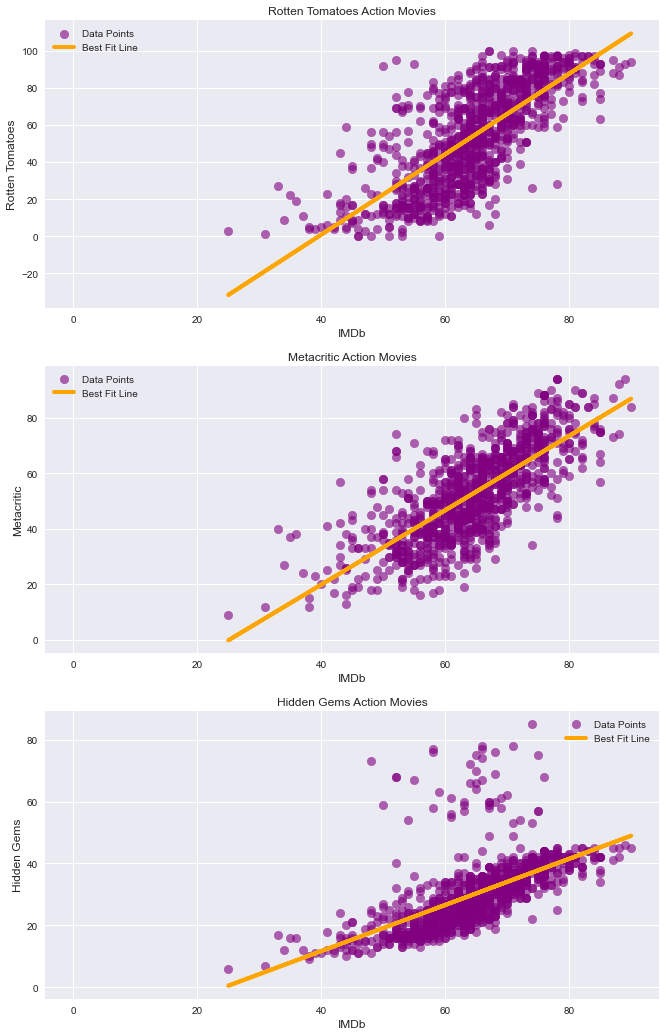

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.plot(0,0)
ax2.plot(0,1)
ax3.plot(0,2)

style.use('seaborn')
ax1.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
ax1.plot(I,regression_line_Tomatoes,label='Best Fit Line', color='orange',linewidth=4)
ax1.set_title('Rotten Tomatoes Action Movies')
ax1.set_xlabel('IMDb', fontsize='12')
ax1.set_ylabel('Rotten Tomatoes', fontsize='12')
ax1.legend()

style.use('seaborn')
ax2.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
ax2.plot(I,regression_line_Metacritic,label='Best Fit Line', color='orange',linewidth=4)
ax2.set_title('Metacritic Action Movies')
ax2.set_xlabel('IMDb', fontsize='12')
ax2.set_ylabel('Metacritic', fontsize='12')
ax2.legend()

style.use('seaborn')
ax3.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
ax3.plot(I,regression_line_Hidden,label='Best Fit Line', color='orange',linewidth=4)
ax3.set_title('Hidden Gems Action Movies')
ax3.set_xlabel('IMDb', fontsize='12')
ax3.set_ylabel('Hidden Gems', fontsize='12')
ax3.legend()

fig.set_figwidth(11)
fig.set_figheight(18)

In [ ]:
# Drama
Score_Genre_df_Drama = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'DRAMA'])
Score_Genre_df_Drama = Score_Genre_df_Drama[Score_Genre_df_Drama['DRAMA']!= 0]
Score_Genre_df_Drama

In [ ]:
# Set DataFrame to Drama columns to lists for best fits
Drama_IMDb_list = Score_Genre_df_Drama['IMDb_Score'].tolist()
Drama_Tomatoes_list = Score_Genre_df_Drama['Rotten_Tomatoes_Score'].tolist()
Drama_Metacritic_list = Score_Genre_df_Drama['Metacritic_Score'].tolist()
Drama_Hidden_Gem_list = Score_Genre_df_Drama['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Drama_IMDb_list, dtype=np.float64)
T = np.array(Drama_Tomatoes_list, dtype=np.float64)
M = np.array(Drama_Metacritic_list, dtype=np.float64)
H = np.array(Drama_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes Drama
# Create linear regression object
IMDb_Tomatoes_Drama = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Drama.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Drama.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Drama Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic Drama
# Create linear regression object
IMDb_Metacritic_Drama = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Drama.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Drama.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Drama Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems Drama
# Create linear regression object
IMDb_Hidden_Gems_Drama = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Drama.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Drama.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Drama Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Science-Fiction
Score_Genre_df_SciFi = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'SCI_FI'])
Score_Genre_df_SciFi = Score_Genre_df_SciFi[Score_Genre_df_SciFi['SCI_FI']!= 0]
Score_Genre_df_SciFi

In [ ]:
# Set DataFrame to SciF columns to lists for best fits
SciFi_IMDb_list = Score_Genre_df_SciFi['IMDb_Score'].tolist()
SciFi_Tomatoes_list = Score_Genre_df_SciFi['Rotten_Tomatoes_Score'].tolist()
SciFi_Metacritic_list = Score_Genre_df_SciFi['Metacritic_Score'].tolist()
SciFi_Hidden_Gem_list = Score_Genre_df_SciFi['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(SciFi_IMDb_list, dtype=np.float64)
T = np.array(SciFi_Tomatoes_list, dtype=np.float64)
M = np.array(SciFi_Metacritic_list, dtype=np.float64)
H = np.array(SciFi_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes SciFi
# Create linear regression object
IMDb_Tomatoes_SciFi = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_SciFi.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_SciFi.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for SciFi Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic SciFi
# Create linear regression object
IMDb_Metacritic_SciFi = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_SciFi.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_SciFi.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for SciFi Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems SciFi
# Create linear regression object
IMDb_Hidden_Gems_SciFi = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_SciFi.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_SciFi.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for SciFi Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Thriller
Score_Genre_df_Thriller = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'THRILLER'])
Score_Genre_df_Thriller = Score_Genre_df_Thriller[Score_Genre_df_Thriller['THRILLER']!= 0]
Score_Genre_df_Thriller

In [ ]:
# Set DataFrame to Thriller columns to lists for best fits
Thriller_IMDb_list = Score_Genre_df_Thriller['IMDb_Score'].tolist()
Thriller_Tomatoes_list = Score_Genre_df_Thriller['Rotten_Tomatoes_Score'].tolist()
Thriller_Metacritic_list = Score_Genre_df_Thriller['Metacritic_Score'].tolist()
Thriller_Hidden_Gem_list = Score_Genre_df_Thriller['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Thriller_IMDb_list, dtype=np.float64)
T = np.array(Thriller_Tomatoes_list, dtype=np.float64)
M = np.array(Thriller_Metacritic_list, dtype=np.float64)
H = np.array(Thriller_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes Thriller
# Create linear regression object
IMDb_Tomatoes_Thriller = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Thriller.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Thriller.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Thriller Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten SciFi Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic Thriller
# Create linear regression object
IMDb_Metacritic_Thriller = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Thriller.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Thriller.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Thriller Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems Thriller
# Create linear regression object
IMDb_Hidden_Gems_Thriller = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Thriller.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Thriller.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Thriller Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Mystery
Score_Genre_df_Mystery = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'MYSTERY'])
Score_Genre_df_Mystery = Score_Genre_df_Mystery[Score_Genre_df_Mystery['MYSTERY']!= 0]
Score_Genre_df_Mystery

In [ ]:
# Set DataFrame to Mystery columns to lists for best fits
Mystery_IMDb_list = Score_Genre_df_Mystery['IMDb_Score'].tolist()
Mystery_Tomatoes_list = Score_Genre_df_Mystery['Rotten_Tomatoes_Score'].tolist()
Mystery_Metacritic_list = Score_Genre_df_Mystery['Metacritic_Score'].tolist()
Mystery_Hidden_Gem_list = Score_Genre_df_Mystery['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Mystery_IMDb_list, dtype=np.float64)
T = np.array(Mystery_Tomatoes_list, dtype=np.float64)
M = np.array(Mystery_Metacritic_list, dtype=np.float64)
H = np.array(Mystery_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes Mystery
# Create linear regression object
IMDb_Tomatoes_Mystery = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Mystery.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Mystery.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Mystery Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten SciFi Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic Mystery
# Create linear regression object
IMDb_Metacritic_Mystery = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Mystery.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Mystery.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Mystery Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems Mystery
# Create linear regression object
IMDb_Hidden_Gems_Mystery = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Mystery.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Mystery.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Mystery Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# History
Score_Genre_df_History = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'HISTORY'])
Score_Genre_df_History = Score_Genre_df_History[Score_Genre_df_History['HISTORY']!= 0]
Score_Genre_df_History

In [ ]:
# Set DataFrame to History columns to lists for best fits
History_IMDb_list = Score_Genre_df_History['IMDb_Score'].tolist()
History_Tomatoes_list = Score_Genre_df_History['Rotten_Tomatoes_Score'].tolist()
History_Metacritic_list = Score_Genre_df_History['Metacritic_Score'].tolist()
History_Hidden_Gem_list = Score_Genre_df_History['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(History_IMDb_list, dtype=np.float64)
T = np.array(History_Tomatoes_list, dtype=np.float64)
M = np.array(History_Metacritic_list, dtype=np.float64)
H = np.array(History_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes History
# Create linear regression object
IMDb_Tomatoes_History = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_History.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_History.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for History Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten SciFi Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic History
# Create linear regression object
IMDb_Metacritic_History = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_History.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_History.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for History Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems History
# Create linear regression object
IMDb_Hidden_Gems_History = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_History.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_History.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for History Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Crime
Score_Genre_df_Crime = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'CRIME'])
Score_Genre_df_Crime = Score_Genre_df_Crime[Score_Genre_df_Crime['CRIME']!= 0]
Score_Genre_df_Crime

In [ ]:
# Set DataFrame to Crime columns to lists for best fits
Crime_IMDb_list = Score_Genre_df_Crime['IMDb_Score'].tolist()
Crime_Tomatoes_list = Score_Genre_df_Crime['Rotten_Tomatoes_Score'].tolist()
Crime_Metacritic_list = Score_Genre_df_Crime['Metacritic_Score'].tolist()
Crime_Hidden_Gem_list = Score_Genre_df_Crime['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Crime_IMDb_list, dtype=np.float64)
T = np.array(Crime_Tomatoes_list, dtype=np.float64)
M = np.array(Crime_Metacritic_list, dtype=np.float64)
H = np.array(Crime_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes Crime
# Create linear regression object
IMDb_Tomatoes_Crime = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Crime.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Crime.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Crime Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Crime Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic Crime
# Create linear regression object
IMDb_Metacritic_Crime = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Crime.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Crime.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Crime Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems Crime
# Create linear regression object
IMDb_Hidden_Gems_Crime = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Crime.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Crime.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Crime Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Adventure
Score_Genre_df_Adventure = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'ADVENTURE'])
Score_Genre_df_Adventure = Score_Genre_df_Adventure[Score_Genre_df_Adventure['ADVENTURE']!= 0]
Score_Genre_df_Adventure

In [ ]:
# Set DataFrame to Adventure columns to lists for best fits
Adventure_IMDb_list = Score_Genre_df_Adventure['IMDb_Score'].tolist()
Adventure_Tomatoes_list = Score_Genre_df_Adventure['Rotten_Tomatoes_Score'].tolist()
Adventure_Metacritic_list = Score_Genre_df_Adventure['Metacritic_Score'].tolist()
Adventure_Hidden_Gem_list = Score_Genre_df_Adventure['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Adventure_IMDb_list, dtype=np.float64)
T = np.array(Adventure_Tomatoes_list, dtype=np.float64)
M = np.array(Adventure_Metacritic_list, dtype=np.float64)
H = np.array(Adventure_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes Adventure
# Create linear regression object
IMDb_Tomatoes_Adventure = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Adventure.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Adventure.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Adventure Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Adventure Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic Adventure
# Create linear regression object
IMDb_Metacritic_Adventure = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Adventure.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Adventure.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Adventure Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems Adventure
# Create linear regression object
IMDb_Hidden_Gems_Adventure = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Adventure.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Adventure.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Adventure Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Animation
Score_Genre_df_Animation = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'ANIMATION'])
Score_Genre_df_Animation = Score_Genre_df_Animation[Score_Genre_df_Animation['ANIMATION']!= 0]
Score_Genre_df_Animation

In [ ]:
# Set DataFrame to Animation columns to lists for best fits
Animation_IMDb_list = Score_Genre_df_Adventure['IMDb_Score'].tolist()
Animation_Tomatoes_list = Score_Genre_df_Adventure['Rotten_Tomatoes_Score'].tolist()
Animation_Metacritic_list = Score_Genre_df_Adventure['Metacritic_Score'].tolist()
Animation_Hidden_Gem_list = Score_Genre_df_Adventure['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Animation_IMDb_list, dtype=np.float64)
T = np.array(Animation_Tomatoes_list, dtype=np.float64)
M = np.array(Animation_Metacritic_list, dtype=np.float64)
H = np.array(Animation_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes Animation
# Create linear regression object
IMDb_Tomatoes_Animation = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Animation.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Animation.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Animation Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Animation Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic Animation
# Create linear regression object
IMDb_Metacritic_Animation = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Animation.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Animation.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Animation Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems AAnimation
# Create linear regression object
IMDb_Hidden_Gems_Animation = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Animation.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Animation.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Animation Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Comedy
Score_Genre_df_Comedy = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'COMEDY'])
Score_Genre_df_Comedy = Score_Genre_df_Comedy[Score_Genre_df_Comedy['COMEDY']!= 0]
Score_Genre_df_Comedy

In [ ]:
# Set DataFrame to Comedy columns to lists for best fits
Comedy_IMDb_list = Score_Genre_df_Comedy['IMDb_Score'].tolist()
Comedy_Tomatoes_list = Score_Genre_df_Comedy['Rotten_Tomatoes_Score'].tolist()
Comedy_Metacritic_list = Score_Genre_df_Comedy['Metacritic_Score'].tolist()
Comedy_Hidden_Gem_list = Score_Genre_df_Comedy['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Comedy_IMDb_list, dtype=np.float64)
T = np.array(Comedy_Tomatoes_list, dtype=np.float64)
M = np.array(Comedy_Metacritic_list, dtype=np.float64)
H = np.array(Comedy_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes Comedy
# Create linear regression object
IMDb_Tomatoes_Comedy = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Comedy.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Comedy.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Comedy Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic Comedy
# Create linear regression object
IMDb_Metacritic_Comedy = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Comedy.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Comedy.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Comedy Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems Comedy
# Create linear regression object
IMDb_Hidden_Gems_Comedy = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Comedy.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Comedy.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Comedy Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Romance
Score_Genre_df_Romance = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'ROMANCE'])
Score_Genre_df_Romance = Score_Genre_df_Romance[Score_Genre_df_Romance['ROMANCE']!= 0]
Score_Genre_df_Romance

In [ ]:
# Set DataFrame to Romance columns to lists for best fits
Romance_IMDb_list = Score_Genre_df_Romance['IMDb_Score'].tolist()
Romance_Tomatoes_list = Score_Genre_df_Romance['Rotten_Tomatoes_Score'].tolist()
Romance_Metacritic_list = Score_Genre_df_Romance['Metacritic_Score'].tolist()
Romance_Hidden_Gem_list = Score_Genre_df_Romance['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Romance_IMDb_list, dtype=np.float64)
T = np.array(Romance_Tomatoes_list, dtype=np.float64)
M = np.array(Romance_Metacritic_list, dtype=np.float64)
H = np.array(Romance_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes Romance
# Create linear regression object
IMDb_Tomatoes_Romance = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Romance.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Romance.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Romance Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic Romance
# Create linear regression object
IMDb_Metacritic_Romance = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Romance.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Romance.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Romance Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems Romance
# Create linear regression object
IMDb_Hidden_Gems_Romance = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Romance.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Romance.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Romance Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Sport
Score_Genre_df_Sport = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'SPORT'])
Score_Genre_df_Sport = Score_Genre_df_Sport [Score_Genre_df_Sport ['SPORT']!= 0]
Score_Genre_df_Sport 

In [ ]:
# Set DataFrame to Sport columns to lists for best fits
Sport_IMDb_list = Score_Genre_df_Sport['IMDb_Score'].tolist()
Sport_Tomatoes_list = Score_Genre_df_Sport['Rotten_Tomatoes_Score'].tolist()
Sport_Metacritic_list = Score_Genre_df_Sport['Metacritic_Score'].tolist()
Sport_Hidden_Gem_list = Score_Genre_df_Sport['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Sport_IMDb_list, dtype=np.float64)
T = np.array(Sport_Tomatoes_list, dtype=np.float64)
M = np.array(Sport_Metacritic_list, dtype=np.float64)
H = np.array(Sport_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes Sport
# Create linear regression object
IMDb_Tomatoes_Sport = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Sport.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Sport.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Sport Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic Sport
# Create linear regression object
IMDb_Metacritic_Sport = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Sport.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Sport.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Sport Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems Sport
# Create linear regression object
IMDb_Hidden_Gems_Sport = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Sport.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Sport.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Sport Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Horror
Score_Genre_df_Horror = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'HORROR'])
Score_Genre_df_Horror = Score_Genre_df_Horror[Score_Genre_df_Horror['HORROR']!= 0]
Score_Genre_df_Horror

In [ ]:
# Set DataFrame to Horror columns to lists for best fits
Horror_IMDb_list = Score_Genre_df_Horror['IMDb_Score'].tolist()
Horror_Tomatoes_list = Score_Genre_df_Horror['Rotten_Tomatoes_Score'].tolist()
Horror_Metacritic_list = Score_Genre_df_Horror['Metacritic_Score'].tolist()
Horror_Hidden_Gem_list = Score_Genre_df_Horror['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Horror_IMDb_list, dtype=np.float64)
T = np.array(Horror_Tomatoes_list, dtype=np.float64)
M = np.array(Horror_Metacritic_list, dtype=np.float64)
H = np.array(Horror_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes Horror
# Create linear regression object
IMDb_Tomatoes_Horror = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Horror.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Horror.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Horror Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic Horror
# Create linear regression object
IMDb_Metacritic_Horror = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Horror.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Horror.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Horror Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems Horror
# Create linear regression object
IMDb_Hidden_Gems_Horror = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Horror.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Horror.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Horror Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Documentary
Score_Genre_df_Documentary = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'DOCUMENTARY'])
Score_Genre_df_Documentary = Score_Genre_df_Documentary[Score_Genre_df_Documentary['DOCUMENTARY']!= 0]
Score_Genre_df_Documentary

In [ ]:
# Set DataFrame to Documentary columns to lists for best fits
Documentary_IMDb_list = Score_Genre_df_Documentary['IMDb_Score'].tolist()
Documentary_Tomatoes_list = Score_Genre_df_Documentary['Rotten_Tomatoes_Score'].tolist()
Documentary_Metacritic_list = Score_Genre_df_Documentary['Metacritic_Score'].tolist()
Documentary_Hidden_Gem_list = Score_Genre_df_Documentary['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Documentary_IMDb_list, dtype=np.float64)
T = np.array(Documentary_Tomatoes_list, dtype=np.float64)
M = np.array(Documentary_Metacritic_list, dtype=np.float64)
H = np.array(Documentary_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes Documentary
# Create linear regression object
IMDb_Tomatoes_Documentary = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Documentary.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Documentary.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Documentary Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic Documentary
# Create linear regression object
IMDb_Metacritic_Documentary = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Documentary.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Documentary.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Documentary Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems Documentary
# Create linear regression object
IMDb_Hidden_Gems_Documentary = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Documentary.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Documentary.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Documentary Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Western
Score_Genre_df_Western = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'WESTERN'])
Score_Genre_df_Western = Score_Genre_df_Western[Score_Genre_df_Western['WESTERN']!= 0]
Score_Genre_df_Western

In [ ]:
# Set DataFrame to Documentary columns to lists for best fits
Western_IMDb_list = Score_Genre_df_Western['IMDb_Score'].tolist()
Western_Tomatoes_list = Score_Genre_df_Western['Rotten_Tomatoes_Score'].tolist()
Western_Metacritic_list = Score_Genre_df_Western['Metacritic_Score'].tolist()
Western_Hidden_Gem_list = Score_Genre_df_Western['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Western_IMDb_list, dtype=np.float64)
T = np.array(Western_Tomatoes_list, dtype=np.float64)
M = np.array(Western_Metacritic_list, dtype=np.float64)
H = np.array(Western_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes Western
# Create linear regression object
IMDb_Tomatoes_Western = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Western.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Western.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Western Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic Western
# Create linear regression object
IMDb_Metacritic_Western = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Western.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Western.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Western Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems Western
# Create linear regression object
IMDb_Hidden_Gems_Western = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Western.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Western.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Western Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Biography
Score_Genre_df_Biography = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'BIOGRAPHY'])
Score_Genre_df_Biography = Score_Genre_df_Biography[Score_Genre_df_Biography['BIOGRAPHY']!= 0]
Score_Genre_df_Biography

In [ ]:
# Set DataFrame to Biography columns to lists for best fits
Biography_IMDb_list = Score_Genre_df_Biography['IMDb_Score'].tolist()
Biography_Tomatoes_list = Score_Genre_df_Biography['Rotten_Tomatoes_Score'].tolist()
Biography_Metacritic_list = Score_Genre_df_Biography['Metacritic_Score'].tolist()
Biography_Hidden_Gem_list = Score_Genre_df_Biography['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Biography_IMDb_list, dtype=np.float64)
T = np.array(Biography_Tomatoes_list, dtype=np.float64)
M = np.array(Biography_Metacritic_list, dtype=np.float64)
H = np.array(Biography_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes Biography
# Create linear regression object
IMDb_Tomatoes_Biography = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Biography.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Biography.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Biography Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic Biography
# Create linear regression object
IMDb_Metacritic_Biography = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Biography.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Biography.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Biography Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems Biography
# Create linear regression object
IMDb_Hidden_Gems_Biography = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Biography.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Biography.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Biography Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Family
Score_Genre_df_Family = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'FAMILY'])
Score_Genre_df_Family = Score_Genre_df_Family[Score_Genre_df_Family['FAMILY']!= 0]
Score_Genre_df_Family

In [ ]:
# Set DataFrame to Family columns to lists for best fits
Family_IMDb_list = Score_Genre_df_Family['IMDb_Score'].tolist()
Family_Tomatoes_list = Score_Genre_df_Family['Rotten_Tomatoes_Score'].tolist()
Family_Metacritic_list = Score_Genre_df_Family['Metacritic_Score'].tolist()
Family_Hidden_Gem_list = Score_Genre_df_Family['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Family_IMDb_list, dtype=np.float64)
T = np.array(Family_Tomatoes_list, dtype=np.float64)
M = np.array(Family_Metacritic_list, dtype=np.float64)
H = np.array(Family_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes Family
# Create linear regression object
IMDb_Tomatoes_Family = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Family.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Family.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Family Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic Family
# Create linear regression object
IMDb_Metacritic_Family = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Family.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Family.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Family Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems Family
# Create linear regression object
IMDb_Hidden_Gems_Family = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Family.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Family.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Family Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Music
Score_Genre_df_Music = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'MUSIC'])
Score_Genre_df_Music = Score_Genre_df_Music[Score_Genre_df_Music['MUSIC']!= 0]
Score_Genre_df_Music

In [ ]:
# Set DataFrame to Music columns to lists for best fits
Music_IMDb_list = Score_Genre_df_Music['IMDb_Score'].tolist()
Music_Tomatoes_list = Score_Genre_df_Music['Rotten_Tomatoes_Score'].tolist()
Music_Metacritic_list = Score_Genre_df_Music['Metacritic_Score'].tolist()
Music_Hidden_Gem_list = Score_Genre_df_Music['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Music_IMDb_list, dtype=np.float64)
T = np.array(Music_Tomatoes_list, dtype=np.float64)
M = np.array(Music_Metacritic_list, dtype=np.float64)
H = np.array(Music_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes Music
# Create linear regression object
IMDb_Tomatoes_Music = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Music.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Music.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Music Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic Music
# Create linear regression object
IMDb_Metacritic_Music = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Music.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Music.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Music Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems Music
# Create linear regression object
IMDb_Hidden_Gems_Music = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Music.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Music.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Music Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Musical
Score_Genre_df_Musical = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'MUSICAL'])
Score_Genre_df_Musical = Score_Genre_df_Musical[Score_Genre_df_Musical['MUSICAL']!= 0]
Score_Genre_df_Musical

In [ ]:
# Set DataFrame to Musical columns to lists for best fits
Musical_IMDb_list = Score_Genre_df_Musical['IMDb_Score'].tolist()
Musical_Tomatoes_list = Score_Genre_df_Musical['Rotten_Tomatoes_Score'].tolist()
Musical_Metacritic_list = Score_Genre_df_Musical['Metacritic_Score'].tolist()
Musical_Hidden_Gem_list = Score_Genre_df_Musical['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Musical_IMDb_list, dtype=np.float64)
T = np.array(Musical_Tomatoes_list, dtype=np.float64)
M = np.array(Musical_Metacritic_list, dtype=np.float64)
H = np.array(Musical_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes Musical
# Create linear regression object
IMDb_Tomatoes_Musical = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Musical.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Musical.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Musical Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic Musical
# Create linear regression object
IMDb_Metacritic_Musical = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Musical.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Musical.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Musical Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems Musical
# Create linear regression object
IMDb_Hidden_Gems_Musical = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Musical.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Musical.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Musical Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# Fantasy
Score_Genre_df_Fantasy = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'FANTASY'])
Score_Genre_df_Fantasy = Score_Genre_df_Fantasy[Score_Genre_df_Fantasy['FANTASY']!= 0]
Score_Genre_df_Fantasy

In [ ]:
# Set DataFrame to Fantasy columns to lists for best fits
Fantasy_IMDb_list = Score_Genre_df_Fantasy['IMDb_Score'].tolist()
Fantasy_Tomatoes_list = Score_Genre_df_Fantasy['Rotten_Tomatoes_Score'].tolist()
Fantasy_Metacritic_list = Score_Genre_df_Fantasy['Metacritic_Score'].tolist()
Fantasy_Hidden_Gem_list = Score_Genre_df_Fantasy['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(Fantasy_IMDb_list, dtype=np.float64)
T = np.array(Fantasy_Tomatoes_list, dtype=np.float64)
M = np.array(Fantasy_Metacritic_list, dtype=np.float64)
H = np.array(Fantasy_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes Fantasy
# Create linear regression object
IMDb_Tomatoes_Fantasy = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_Fantasy.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_Fantasy.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for Fantasy Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic Fantasy
# Create linear regression object
IMDb_Metacritic_Fantasy = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_Fantasy.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_Fantasy.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for Fantasy Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems Fantasy
# Create linear regression object
IMDb_Hidden_Gems_Fantasy = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_Fantasy.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_Fantasy.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for Fantasy Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# War
Score_Genre_df_War = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'WAR'])
Score_Genre_df_War = Score_Genre_df_War[Score_Genre_df_War['WAR']!= 0]
Score_Genre_df_War

In [ ]:
# Set DataFrame to War columns to lists for best fits
War_IMDb_list = Score_Genre_df_War['IMDb_Score'].tolist()
War_Tomatoes_list = Score_Genre_df_War['Rotten_Tomatoes_Score'].tolist()
War_Metacritic_list = Score_Genre_df_War['Metacritic_Score'].tolist()
War_Hidden_Gem_list = Score_Genre_df_War['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(War_IMDb_list, dtype=np.float64)
T = np.array(War_Tomatoes_list, dtype=np.float64)
M = np.array(War_Metacritic_list, dtype=np.float64)
H = np.array(War_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes War
# Create linear regression object
IMDb_Tomatoes_War = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_War.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_War.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for War Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic War
# Create linear regression object
IMDb_Metacritic_War = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_War.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_War.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for War Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems War
# Create linear regression object
IMDb_Hidden_Gems_War = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_War.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_War.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for War Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()

In [ ]:
# News
Score_Genre_df_News = Score_Genre_df.filter(['Hidden_Gem_Score','IMDb_Score','Rotten_Tomatoes_Score','Metacritic_Score', 'NEWS'])
Score_Genre_df_News = Score_Genre_df_News[Score_Genre_df_News['NEWS']!= 0]
Score_Genre_df_News

In [ ]:
# Set DataFrame to News columns to lists for best fits
News_IMDb_list = Score_Genre_df_News['IMDb_Score'].tolist()
News_Tomatoes_list = Score_Genre_df_News['Rotten_Tomatoes_Score'].tolist()
News_Metacritic_list = Score_Genre_df_News['Metacritic_Score'].tolist()
News_Hidden_Gem_list = Score_Genre_df_News['Hidden_Gem_Score'].tolist()

# Set said lists to arrays
I = np.array(News_IMDb_list, dtype=np.float64)
T = np.array(News_Tomatoes_list, dtype=np.float64)
M = np.array(News_Metacritic_list, dtype=np.float64)
H = np.array(News_Hidden_Gem_list, dtype=np.float64)

In [ ]:
# IMDb vs. Rotten Tomatoes News
# Create linear regression object
IMDb_Tomatoes_News = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Tomatoes_News.fit(I.reshape(-1,1),T)

# Get the regression line using the trained model
regression_line = IMDb_Tomatoes_News.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,T,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Rotten Tomatoes for News Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Rotten Tomatoes Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Metacritic News
# Create linear regression object
IMDb_Metacritic_News = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Metacritic_News.fit(I.reshape(-1,1),M)

# Get the regression line using the trained model
regression_line = IMDb_Metacritic_News.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,M,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Metacritic for News Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Metacritic Score')
plt.legend()
plt.show()

In [ ]:
# IMDb vs. Hidden Gems News
# Create linear regression object
IMDb_Hidden_Gems_News = linear_model.LinearRegression()

# Train the model using the training sets
IMDb_Hidden_Gems_News.fit(I.reshape(-1,1),H)

# Get the regression line using the trained model
regression_line = IMDb_Hidden_Gems_News.predict(I.reshape(-1,1))

# Graphing
style.use('seaborn')
plt.scatter(I,H,label='Data Points', alpha=0.6,color='purple',s=75)
plt.plot(I,regression_line,label='Best Fit Line', color='orange',linewidth=4)
plt.title('IMDb vs Hidden Gems for News Movies')
plt.xlabel('IMDb Score')
plt.ylabel('Hidden Gems')
plt.legend()
plt.show()